표준정규화
-Z-score, MinMax

In [3]:
# 데이터 변환
# 1) 표준 정규화

import numpy as np
import pandas as pd

# 1000명의 육류 소비량 데이터(표준편차, +평균)
meat_consumption_korea = 5*np.random.randn(1000) + 53.9
meat_consumption_japan = 4*np.random.randn(1000) + 32.7

# 데이터프레임 형성
meat_consumption = pd.DataFrame({"한국인": meat_consumption_korea,"일본인": meat_consumption_japan})

# 상위 6개 데이터 확인
meat_consumption.head(6)

,한국인,일본인
0,57.122513,35.515525
1,51.867028,35.804292
2,57.452629,37.183337
3,50.712490,34.879682
4,55.056544,34.958870
5,52.290872,36.950206


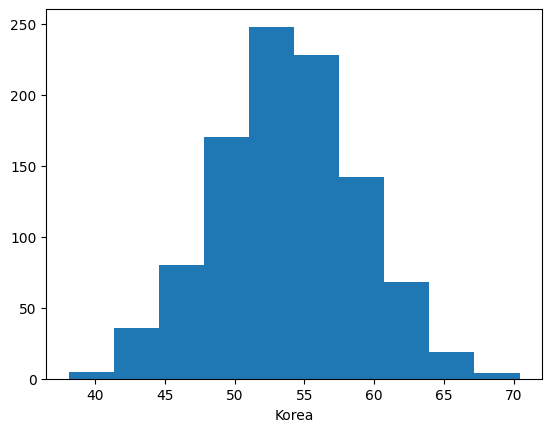

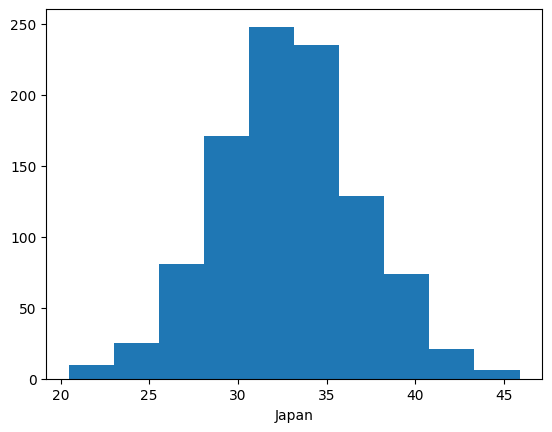

In [4]:
import matplotlib.pyplot as plt

# 한국인 육류소비량 히스토그램
plt.hist(meat_consumption_korea)
plt.xlabel("Korea")
plt.show()

# 일본인 육류소비량 히스토그램
plt.hist(meat_consumption_japan)
plt.xlabel("Japan")
plt.show()

In [6]:
# Z-표준화
# 각 데이터 값에서 평균을 뺀 후 표준편차로 나누어 준 값(평균:0, 표준편차:1)

# 1. zscore() 함수

import scipy.stats as ss

meat_consumption['한국인_정규화'] = ss.zscore(meat_consumption_korea)
meat_consumption["일본인_정규화"] = ss.zscore(meat_consumption_japan)

meat_consumption.head()

,한국인,일본인,한국인_정규화,일본인_정규화
0,57.122513,35.515525,0.649153,0.642092
1,51.867028,35.804292,-0.373958,0.712466
2,57.452629,37.183337,0.713418,1.048550
3,50.712490,34.879682,-0.598718,0.487132
4,55.056544,34.958870,0.246960,0.506431


In [8]:
# 2. (x-np.mean(x)/np.std(x)) -> 직접 식을 만들어서 표준화

meat_consumption['한국인_정규화2'] = (meat_consumption_korea - np.mean(meat_consumption_korea))/np.std(meat_consumption_korea)
meat_consumption['일본인_정규화2'] = (meat_consumption_japan - np.mean(meat_consumption_japan))/np.std(meat_consumption_japan)

meat_consumption.head()

,한국인,일본인,한국인_정규화,일본인_정규화,한국인_정규화2,일본인_정규화2
0,57.122513,35.515525,0.649153,0.642092,0.649153,0.642092
1,51.867028,35.804292,-0.373958,0.712466,-0.373958,0.712466
2,57.452629,37.183337,0.713418,1.048550,0.713418,1.048550
3,50.712490,34.879682,-0.598718,0.487132,-0.598718,0.487132
4,55.056544,34.958870,0.246960,0.506431,0.246960,0.506431


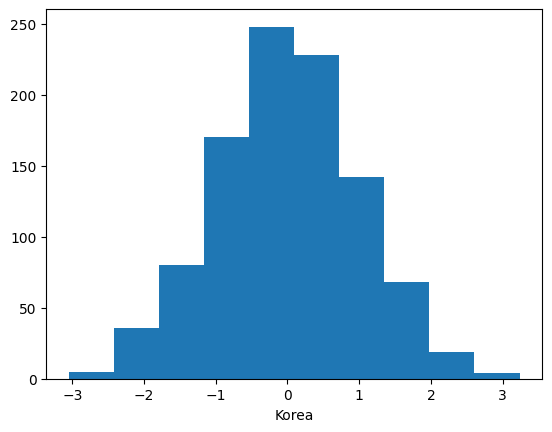

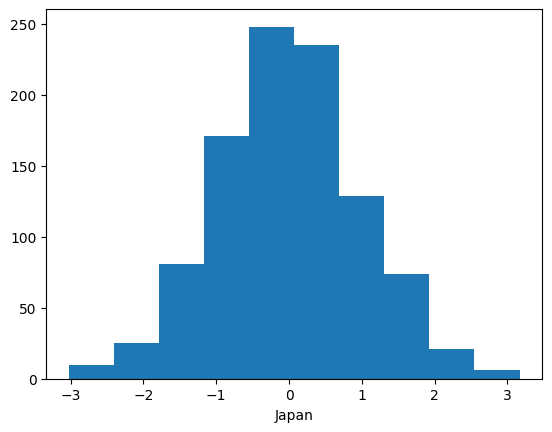

In [9]:
# 표준화된 데이터에 대한 히스토그램

plt.hist(meat_consumption["한국인_정규화"])
plt.xlabel('Korea')
plt.show()

plt.hist(meat_consumption['일본인_정규화'])
plt.xlabel('Japan')
plt.show()

In [10]:
# 3. 사이킷 스케일러 이용 정규화
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
meat_consumption["한국인_정규화3"] = scaler.fit_transform(meat_consumption[["한국인"]])
meat_consumption["일본인_정규화3"] = scaler.fit_transform(meat_consumption[["일본인"]])

meat_consumption.head()

,한국인,일본인,한국인_정규화,일본인_정규화,한국인_정규화2,일본인_정규화2,한국인_정규화3,일본인_정규화3
0,57.122513,35.515525,0.649153,0.642092,0.649153,0.642092,0.649153,0.642092
1,51.867028,35.804292,-0.373958,0.712466,-0.373958,0.712466,-0.373958,0.712466
2,57.452629,37.183337,0.713418,1.048550,0.713418,1.048550,0.713418,1.048550
3,50.712490,34.879682,-0.598718,0.487132,-0.598718,0.487132,-0.598718,0.487132
4,55.056544,34.958870,0.246960,0.506431,0.246960,0.506431,0.246960,0.506431


In [11]:
 # Min-Max 정규화

 # 1. 사이킷런 함수사용

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

meat_consumption['한국인_minmax'] = scaler.fit_transform(meat_consumption[['한국인']])
meat_consumption['일본인_minmax'] = scaler.fit_transform(meat_consumption[['일본인']])

meat_consumption.head()

,한국인,일본인,한국인_정규화,일본인_정규화,한국인_정규화2,일본인_정규화2,한국인_정규화3,일본인_정규화3,한국인_minmax,일본인_minmax
0,57.122513,35.515525,0.649153,0.642092,0.649153,0.642092,0.649153,0.642092,0.588556,0.592507
1,51.867028,35.804292,-0.373958,0.712466,-0.373958,0.712466,-0.373958,0.712466,0.425862,0.603869
2,57.452629,37.183337,0.713418,1.048550,0.713418,1.048550,0.713418,1.048550,0.598776,0.658131
3,50.712490,34.879682,-0.598718,0.487132,-0.598718,0.487132,-0.598718,0.487132,0.390121,0.567489
4,55.056544,34.958870,0.246960,0.506431,0.246960,0.506431,0.246960,0.506431,0.524600,0.570605


In [12]:
# 2. (x-np.min(x))/(np.max(x)-np.min(x)) -> 직접 식으로 표현하는 방법

meat_consumption['한국인_minmax2'] = (meat_consumption[['한국인']]- np.min(meat_consumption_korea))/(np.max(meat_consumption_korea)-np.min(meat_consumption_korea))
meat_consumption['일본인_minmax2'] = (meat_consumption[['일본인']]- np.min(meat_consumption_japan))/(np.max(meat_consumption_japan)-np.min(meat_consumption_japan))

meat_consumption.head()

,한국인,일본인,한국인_정규화,일본인_정규화,한국인_정규화2,일본인_정규화2,한국인_정규화3,일본인_정규화3,한국인_minmax,일본인_minmax,한국인_minmax2,일본인_minmax2
0,57.122513,35.515525,0.649153,0.642092,0.649153,0.642092,0.649153,0.642092,0.588556,0.592507,0.588556,0.592507
1,51.867028,35.804292,-0.373958,0.712466,-0.373958,0.712466,-0.373958,0.712466,0.425862,0.603869,0.425862,0.603869
2,57.452629,37.183337,0.713418,1.048550,0.713418,1.048550,0.713418,1.048550,0.598776,0.658131,0.598776,0.658131
3,50.712490,34.879682,-0.598718,0.487132,-0.598718,0.487132,-0.598718,0.487132,0.390121,0.567489,0.390121,0.567489
4,55.056544,34.958870,0.246960,0.506431,0.246960,0.506431,0.246960,0.506431,0.524600,0.570605,0.524600,0.570605


정규분포변환

왜도는 분포의 대칭척도이다.
* 양수- 왼쪽으로 치우침(평균>중앙값>최빈값)
* 0- 좌우대칭(평균= 중앙값= 최빈값)
* 음수- 오른쪽으로 치우침(평균<중앙값<최빈값)

-> 왜도에 따라서 기존의 데이터 분포 형태를 변경해야 할 경우가 있다.

요령: 독립변수 값이 증가함에 따라 종속변수가 더 빠르게 증가하는 경우는 로그변환을 시도한다.

데이터가 위와 반대인 경우는 제곱변환을 시도한다.

In [14]:
# 데이터의 왜도계산을 위한 파일을 읽어옴

df = pd.read_csv("https://raw.githubusercontent.com/YoungjinBD/dataset/main/USJudgeRatings.csv")
df.head()
# 데이터설명: 미국 변호사들이 고등법원판사를 평가한 데이터

,Unnamed: 0,CONT,INTG,DMNR,DILG,CFMG,DECI,PREP,FAMI,ORAL,WRIT,PHYS,RTEN
0,"AARONSON,L.H.",5.7,7.9,7.7,7.3,7.1,7.4,7.1,7.1,7.1,7.0,8.3,7.8
1,"ALEXANDER,J.M.",6.8,8.9,8.8,8.5,7.8,8.1,8.0,8.0,7.8,7.9,8.5,8.7
2,"ARMENTANO,A.J.",7.2,8.1,7.8,7.8,7.5,7.6,7.5,7.5,7.3,7.4,7.9,7.8
3,"BERDON,R.I.",6.8,8.8,8.5,8.8,8.3,8.5,8.7,8.7,8.4,8.5,8.8,8.7
4,"BRACKEN,J.J.",7.3,6.4,4.3,6.5,6.0,6.2,5.7,5.7,5.1,5.3,5.5,4.8


In [15]:
# 왜도 계산

print(ss.skew(df["CONT"])) # 1.08 수준의 양의 왜도 - CONT: 변호사와 판사의 접촉수
print(ss.skew(df["PHYS"])) # -1.53 수준의 음의 왜도 _ PHYS: 판사의 신체능력

1.0859724796276253
-1.5582154642293153


왜도에 따른 변수 변환식

양수 - 제곱근 변환: sqrt(x) , 로그변환: lod(x) 또는 log10(x), 역수변환: 1/x

음수 - 제곱근 변환; sqrt((x+1)-x) ,로그변환: log(max(x+1)-x) 또는 log10(max(x+1)-x), 역수변환: 1/(max(x+1)-x)

In [17]:
# log()변환

df['CONT1'] = np.log(df["CONT"])
df["PHYS1"] = np.log(np.max(df["PHYS"] + 1)-df['PHYS'])

print(ss.skew(df["CONT1"]))
print(ss.skew(df["PHYS1"]))

0.6555571886692603
0.5824357748750443


범주화, 이산형화
- cut(), qcut()

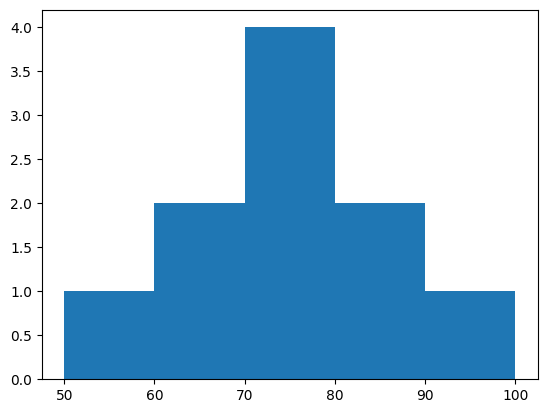

,이름,수학점수
0,철수,52
1,영희,92
2,미영,84
3,시완,71
4,미경,65
5,영환,81
6,숙경,66
7,부영,77
8,민섭,73
9,보연,74


In [20]:
# 수학점수 데이터
data = [['철수',52],['영희',92],['미영',84],['시완',71],['미경',65],['영환',81],['숙경',66],['부영',77],['민섭',73],['보연',74]]
df= pd.DataFrame(data,columns=['이름','수학점수'])

# 히스토그램
plt.hist(df['수학점수'],bins=5, range=[50,100])
plt.show()
df

In [24]:
# 1.조건을 직접 정하여서 나누기

# 등급 칼럼을 만들고 0으로 초기화
df["등급"] = 0

df.loc[(df["수학점수"]<60),'등급'] ='F'
df.loc[(df["수학점수"]>=60) & (df['수학점수']<70), "등급"] ='D'
df.loc[(df["수학점수"]>=70) & (df['수학점수']<80), '등급'] ='C'
df.loc[(df["수학점수"]>=80) & (df['수학점수']<90), '등급'] ='B'
df.loc[(df["수학점수"]>=90) & (df['수학점수']<=100), '등급'] ='A'

df

<ipython-input-24-9eb74b9e6be5>:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'F' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[(df["수학점수"]<60),'등급'] ='F'


,이름,수학점수,등급
0,철수,52,F
1,영희,92,A
2,미영,84,B
3,시완,71,C
4,미경,65,D
5,영환,81,B
6,숙경,66,D
7,부영,77,C
8,민섭,73,C
9,보연,74,C


In [28]:
# 2. cut() 함수 사용하기

df["등급2"] = pd.cut(x=df['수학점수'],bins=[0,60,70,80,90,100],labels=['F','D','C','B','A'],include_lowest=True) # include옵션은 왼쪽 경게 숫자를 포함한다.

# 3. qcut() 함수 사용하기

df["등급3"] = pd.qcut(x=df['수학점수'],q=5,labels = ['F','D','C','B','A'])
df

,이름,수학점수,등급,등급2,등급3
0,철수,52,F,F,F
1,영희,92,A,A,A
2,미영,84,B,B,A
3,시완,71,C,C,D
4,미경,65,D,D,F
5,영환,81,B,B,B
6,숙경,66,D,D,D
7,부영,77,C,C,B
8,민섭,73,C,C,C
9,보연,74,C,C,C
